In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
from keras import callbacks

#### [1] 데이터 불러오기

In [56]:
df = pd.read_excel('./data/default of credit card clients.xls', header=1, index_col=0)

In [57]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [58]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [59]:
# 결측치 확인
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [60]:
# 인풋과 타겟 분리
X_data = df.iloc[:, :-1]
y_data = df.iloc[:,-1]

In [61]:
X_data.shape, y_data.shape

((30000, 23), (30000,))

In [62]:
y_data.value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

#### [2] 데이터 전처리

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_data)
X_data_scaled = scaler.transform(X_data)

#### [2] PCA

In [64]:
pca = PCA()
pca.fit(X_data_scaled)

PCA()

In [65]:
# 주성분 행렬
pca.singular_values_

array([443.04929774, 350.6420357 , 215.70539822, 210.16175361,
       175.37713289, 169.45792011, 165.00799458, 163.18238146,
       161.67090383, 153.25759279, 148.26882983, 143.12454352,
       130.87573497, 125.42606134, 110.04188243,  88.29841154,
        86.45145711,  75.23782289,  62.87756995,  45.87669015,
        34.97910792,  27.54735755,  26.39274393])

In [66]:
# 주성분 투영 후 분산 비율정도 설명
pca.explained_variance_ratio_

array([0.28448215, 0.17818817, 0.06743307, 0.06401154, 0.04457556,
       0.04161737, 0.03946035, 0.03859201, 0.03788041, 0.03404042,
       0.03186036, 0.02968788, 0.02482385, 0.02279956, 0.01754959,
       0.01129943, 0.01083167, 0.00820396, 0.00572984, 0.00305025,
       0.00177324, 0.00109979, 0.00100953])

##### [3] 주성분 갯수 지정

[3] - 1 pca.explained_variance_ratio_의 누적값에서 원하는 분포정도 지정해서 PC 갯수 계산

In [67]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)

# 누적값이 0.95 필요한 경우
d = np.argmax(cumsum >= 0.95) + 1
print(f'주성분 갯수(차원 : {d}')

주성분 갯수(차원 : 15


In [68]:
# 지정된 PC 갯수로 주성분 데이터 압축/융합
pca2 =PCA(n_components = d)
pca.fit(X_data_scaled)
X_data_PCA2 = pca.transform(X_data_scaled)

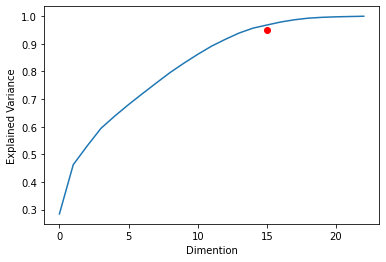

In [69]:
# 주성분 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.xlabel("Dimention")
plt.ylabel("Explained Variance")
plt.show()

[3] - 2 n_components = 0.0 ~ 1.0 : 주성분 투영된 데이터 분포 정도 지정하면 PC 갯수 자동 계산

In [70]:
pca3 = PCA(n_components = 0.95)
pca3.fit(X_data_scaled)
pca3.components_

array([[ 6.85184323e-02, -2.16564559e-02,  1.92056117e-02,
        -5.60026083e-03,  1.42315227e-02,  1.61081970e-01,
         1.94119641e-01,  2.00213038e-01,  2.07038234e-01,
         2.10960472e-01,  2.06412352e-01,  3.34385122e-01,
         3.45796995e-01,  3.49777117e-01,  3.53883216e-01,
         3.51752413e-01,  3.44514390e-01,  9.42312296e-02,
         7.86808761e-02,  8.63941854e-02,  7.77927170e-02,
         7.53544304e-02,  6.99481572e-02],
       [ 3.16322879e-01,  3.05947306e-02, -9.15225417e-02,
        -4.32509370e-02,  6.65780269e-02, -2.98123879e-01,
        -3.34820614e-01, -3.43894067e-01, -3.44581437e-01,
        -3.31600381e-01, -3.05793874e-01,  1.39815174e-01,
         1.40226985e-01,  1.46213389e-01,  1.45449832e-01,
         1.43760869e-01,  1.41872155e-01,  1.49109472e-01,
         1.39871902e-01,  1.51570097e-01,  1.41409070e-01,
         1.37190501e-01,  1.29396376e-01],
       [ 1.74535217e-02,  2.40375133e-02, -3.16425804e-01,
         4.53184753e-01, -4.6

In [71]:
X_data_PCA3 = pca3.transform(X_data_scaled)
X_data_PCA3.shape

(30000, 15)

In [72]:
df_X_data_PCA3 = pd.DataFrame(X_data_PCA3)

In [73]:
df_X_data_PCA3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.887962,-0.906109,-0.487795,-0.540015,0.997957,0.044404,-0.623687,0.112794,-0.189894,-0.084602,0.245364,3.264405,-1.048591,-0.318525,-0.197425
1,-0.764696,-2.109288,1.097314,-0.483480,0.858980,-0.235098,0.064742,0.093595,-0.153700,0.124035,0.141711,-0.881855,0.078162,-0.273304,0.438007
2,-0.847408,-1.072179,0.412178,-0.433564,0.770493,0.018665,-0.150472,-0.091884,-0.156179,0.089171,0.046222,-0.273012,0.519953,0.338603,0.014379
3,-0.196589,-0.809022,-0.818642,0.292878,0.909366,-0.284645,0.235221,-0.062984,0.114612,-0.067007,0.021318,0.039545,-0.711917,0.504354,0.056116
4,-0.840934,-0.072538,-1.005257,2.328013,-1.023124,0.794330,0.711069,0.124191,0.602528,-0.307478,1.035848,-0.608437,0.072147,1.327269,0.214260


#### [4] 모델 생성

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data_PCA3, y_data, stratify=y_data
)

In [75]:
y_train.value_counts()

0    17523
1     4977
Name: default payment next month, dtype: int64

In [76]:
y_test.value_counts()

0    5841
1    1659
Name: default payment next month, dtype: int64

In [77]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_shape = (15,), activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                256       
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-traina

In [78]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [79]:
def scheduler(epoch):
	if epoch<10:
		return 0.001
	else:
		return 0.001 * tf.math.exp(0.1 *(10-epoch))

callback = callbacks.LearningRateScheduler(scheduler)

In [80]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[callback]
    )

Epoch 1/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4897 - accuracy: 0.7870 - val_loss: 0.4431 - val_accuracy: 0.8172 - lr: 0.0010
Epoch 2/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.8136 - val_loss: 0.4370 - val_accuracy: 0.8184 - lr: 0.0010
Epoch 3/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.8151 - val_loss: 0.4324 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 4/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4357 - accuracy: 0.8176 - val_loss: 0.4306 - val_accuracy: 0.8207 - lr: 0.0010
Epoch 5/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4331 - accuracy: 0.8176 - val_loss: 0.4309 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 6/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4312 - accuracy: 0.8187 - val_loss: 0.4317 - val_accuracy: 0.8216 - lr: 0.0010
Epoch 7/100
704/704 [==============================] - 1s 2ms/st

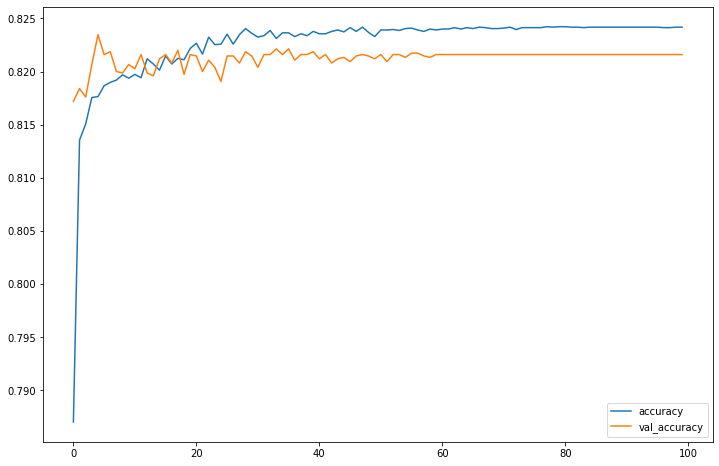

In [81]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()